In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Reading a .cmplx file
Each *.cmplx* file is a python list of dictionaries that can be read using the *pickle* module.

**Note.** Change the filename accordingly.

In [2]:
filename = "18_08_2023_16_26_50_csi.cmplx"
with open(filename, "rb") as file:
  data = pickle.load(file)

# Analysis on The Sample

In [12]:
num_of_sniffers = len(data)
print(f"{num_of_sniffers} sniffers has been detected!")

for i, sniffer in enumerate(data):
  print(f"Sniffer #{i+1}:")
  print(f"  - IP address: {sniffer['collector_ip']}")
  print(f"  - Number of CSI samples: {len(sniffer['time_stamp_ns'])}")
  duration = (sniffer['time_stamp_ns'][-1] - sniffer['time_stamp_ns'][0]) / 1e9
  print(f"  - Duration of CSI collection: {duration:.1f} seconds")
  RSS = sniffer['RSS']
  complex_csi = sniffer['complex_csi']
  num_of_subcarriers = complex_csi.shape[1]
  print(f"  - Number of subcarriers: {num_of_subcarriers}")

2 sniffers has been detected!
Sniffer #1:
  - IP address: 192.168.50.245
  - Number of CSI samples: 360
  - Duration of CSI collection: 11.5 seconds
  - Number of subcarriers: 256
Sniffer #2:
  - IP address: 192.168.50.111
  - Number of CSI samples: 360
  - Duration of CSI collection: 11.5 seconds
  - Number of subcarriers: 256


# Plot the Magnitude of Subcarriers Over Time

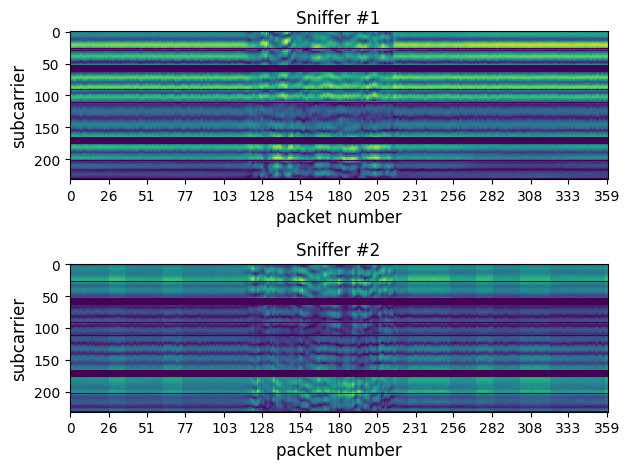

In [22]:
from numpy.core.fromnumeric import size
num_of_sniffers = len(data)
fig, axes = plt.subplots(nrows=num_of_sniffers, ncols=1)
if num_of_sniffers == 1:
  axes = [axes]

for i, sniffer in enumerate(data):
  time_stamp_ns = sniffer['time_stamp_ns']
  complex_csi = sniffer['complex_csi']
  amplitudes = abs(complex_csi)

  # removing all unused and pilot subcarriers for clarity and precision
  amplitudes = np.delete(amplitudes, [0, 1, 2, 3, 4, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 253, 254, 255], axis=1)

  ax = axes[i]
  places = np.round(np.linspace(0, len(time_stamp_ns) - 1, 15)).astype(int)
  ax.set_xticks(places, places, rotation='horizontal', fontsize=10, fontweight='regular')
  ax.imshow(amplitudes.T, interpolation="nearest", aspect="auto")
  ax.set_title(f"Sniffer #{i+1}")
  ax.set_xlabel("packet number", fontsize=12, fontweight='regular')
  ax.set_ylabel("subcarrier", fontsize=12, fontweight='regular')

fig.tight_layout()
plt.show()